# Trigger CPU Time Studies:



In [1]:
#from Gaugi.monet.TAxisFunctions import *
#from Gaugi.monet.PlotFunctions import *
#from Gaugi.monet import ATLASLabel
from ROOT import TH1,TH1F, TH2F, TProfile,TCanvas, TFile, TPad, TColor
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow
import numpy as np
import math, ROOT
import rootplotlib as rpl
rpl.set_atlas_style()
rpl.suppress_root_warnings()


%config InlineBackend.figure_format = 'retina'
#%jsroot on
#%config InlineBackend.figure_format = 'svg'

Module libc not found.


Welcome to JupyROOT 6.26/10

Applying ATLAS style settings...


In [1]:
def add_legend(x,y,legends,textsize):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=18, option='F')


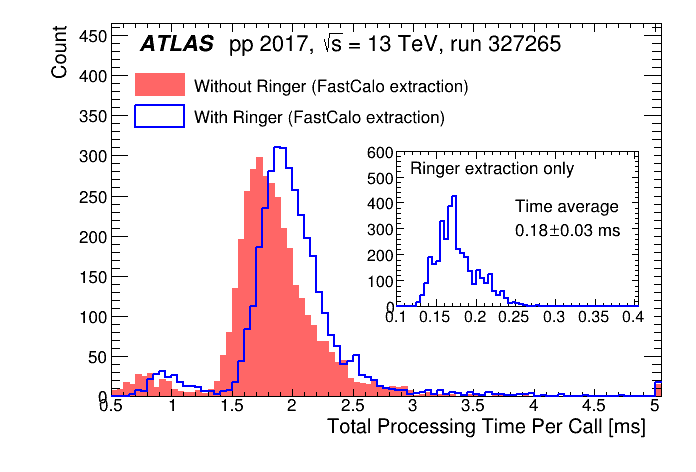

In [31]:
f_ringer    = TFile("/mnt/cern_data/joao.pinto/data17_13TeV/files/commissioning/time_studies/samples/ringer.root",'r')
f_noringer  = TFile("/mnt/cern_data/joao.pinto/data17_13TeV/files/commissioning/time_studies/samples/noringer.root",'r')
h1 = f_noringer.Get("T2CaloEgamma_eGamma/Execute_Time")
h2 = f_ringer.Get("T2CaloEgamma_Ringer/Execute_Time")
h3 = f_ringer.Get("T2CaloEgamma_Ringer/RingerFex_Execute_Time")

drawopt='hist,same'
divide=''

fig = rpl.create_canvas("canvas", "", 700, 500)
rpl.set_figure(fig)
canvas = fig.canvas()
canvas.cd()

h1.SetLineColor(kRed-7)
h1.SetFillColor(kRed-7)
h1.SetMarkerColor(kRed-7)
h1.SetAxisRange(0.5,5,'X')
h1.SetName('')

h2.SetLineColor(kBlue)
h2.SetLineWidth(2)
h2.SetName('')
h2.SetAxisRange(0.5,5,'X')

h1.Draw(drawopt)
h2.Draw(drawopt)

bot = TPad("pad_bot", "This is the bottom pad",0.50,0.25,0.94,0.7)
bot.SetBottomMargin(0.10/float(bot.GetHNDC()))
bot.SetTopMargin   (0.02/float(bot.GetHNDC()))
bot.SetRightMargin (0.05)
bot.SetLeftMargin  (0.16)
bot.SetFillColor(0)
bot.Draw(drawopt)
bot.cd()
    
h3.SetAxisRange(0.1, 0.4,"X")
h3.SetLineWidth(2)
h3.SetLineColor(kBlue)
h3.SetFillColor(0)
h3.Draw()
rpl.format_canvas_axes(XLabelSize=18, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1.5, pad="pad_bot")
rpl.set_ylabel("" ,pad="pad_bot")
rpl.set_xlabel('Processing Time Per Call [ms]', pad="pad_bot")
rpl.set_yaxis_ranges(0, 600, pad='pad_bot')
h3.Draw(drawopt)
   
canvas.Modified()
canvas.Update()
canvas.cd()
tictac = f"{'%1.2f'%h3.GetMean()}#pm{'%1.2f'%h3.GetStdDev()} ms"
rpl.add_text( 0.59, 0.63, "Ringer extraction only",textsize=0.04)
rpl.add_text( 0.74, 0.55, "Time average",textsize=0.04)
rpl.add_text( 0.74, 0.5, tictac,textsize=0.04)
rpl.add_text( 0.2, 0.89, 'ATLAS'   , textsize=0.05, textfont=72)
rpl.add_text( 0.33, 0.89, 'pp 2017, #sqrt{s} = 13 TeV, run 327265'   , textsize=0.05)
legends = ['Without Ringer (FastCalo extraction)','With Ringer (FastCalo extraction)']

add_legend( 0.18,0.72, legends,20)
rpl.format_canvas_axes(XLabelSize=18, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1.5)
fig.set_ylabel("Count")
fig.set_xlabel('Total Processing Time Per Call [ms]')
rpl.set_yaxis_ranges(0, 465) #, pad='pad_top')
fig.show()
fig.savefig("EgammaFex_TotalTime.pdf")
    


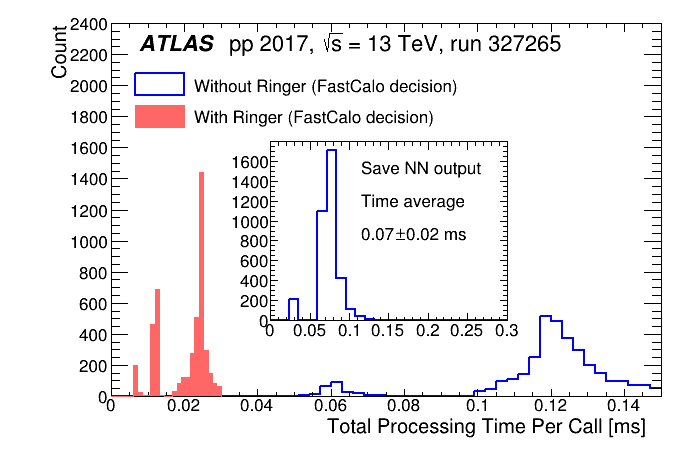

In [45]:

f_ringer    = TFile("/mnt/cern_data/joao.pinto/data17_13TeV/files/commissioning/time_studies/samples/ringer.root",'r')
f_noringer  = TFile("/mnt/cern_data/joao.pinto/data17_13TeV/files/commissioning/time_studies/samples/noringer.root",'r')
drawopt='hist,same'
divide=''

    
fig = rpl.create_canvas("canvas", "", 700, 500)
rpl.set_figure(fig)
canvas = fig.canvas()
canvas.cd()
h1 = f_ringer.Get("TrigL2CaloRingerHypo_e26_lhtight/Execute_Time")
h2 = f_ringer.Get("TrigL2CaloRingerFex_e26_lhtight/Execute_Time")
h_noringer = f_noringer.Get("TrigL2CaloHypo_e26_lhtight/Execute_Time")
    
    
# make shift
offset = h1.FindBin( h1.GetMean() )
offset = h2.FindBin(offset*h1.GetXaxis().GetXmax()/float(h1.GetNbinsX()))
h_shift = TH1F('','', h2.GetNbinsX(), 0, h2.GetXaxis().GetXmax())
for bin in range(h2.GetNbinsX()):
    h_shift.SetBinContent( bin+offset, h2.GetBinContent(bin) )
h_ringer = h_shift
 

h_noringer.SetLineColor(kRed-7)
h_noringer.SetFillColor(kRed-7)
h_noringer.SetMarkerColor(kRed-7)
h_noringer.SetAxisRange(0,0.15,'X')
h_noringer.Rebin(2)
h_noringer.SetMaximum(1750)

h_ringer.SetLineColor(kBlue)
h_ringer.SetLineWidth(2)
h_ringer.SetAxisRange(0,0.15,'X')
#h_ringer.SetMaximum(1750)


h_ringer.Draw(drawopt)
h_noringer.Draw(drawopt)

    
h3 = f_ringer.Get('TrigL2CaloRingerFex_e26_lhtight/StoreOutput_Time')
bot = TPad("pad_bot", "This is the bottom pad",0.32,0.22,0.75,0.72)
bot.SetBottomMargin(0.10/float(bot.GetHNDC()))
bot.SetTopMargin   (0.02/float(bot.GetHNDC()))
bot.SetRightMargin (0.05)
bot.SetLeftMargin  (0.16)
bot.SetFillColor(0)
bot.Draw(drawopt)
bot.cd()
h3.SetAxisRange(0.02, 0.14,"X")
h3.SetLineColor(kBlue)
h3.SetLineWidth(2)
h3.Rebin(4)
h3.SetFillColor(0)
rpl.set_ylabel("" ,pad="pad_bot")
rpl.set_xlabel("", pad="pad_bot")
h3.Draw(drawopt)
rpl.format_canvas_axes(XLabelSize=18, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1.5, pad="pad_bot")

    
canvas.Modified()
canvas.Update()
canvas.cd()
tictac = f"{'%1.2f'%h3.GetMean()}#pm{'%1.2f'%h3.GetStdDev()} ms"
rpl.add_text( 0.52, 0.63, "Save NN output",textsize=0.04)
rpl.add_text( 0.52, 0.56, "Time average",textsize=0.04)
rpl.add_text( 0.52, 0.49, tictac,textsize=0.04)
rpl.add_text( 0.2, 0.89, 'ATLAS'   , textsize=0.05, textfont=72)
rpl.add_text( 0.33, 0.89, 'pp 2017, #sqrt{s} = 13 TeV, run 327265'   , textsize=0.05)
legends = ['Without Ringer (FastCalo decision)','With Ringer (FastCalo decision)']
add_legend( 0.18,0.72, legends,20)
    
    
rpl.format_canvas_axes(XLabelSize=18, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1.5)
fig.set_ylabel("Count")
fig.set_xlabel('Total Processing Time Per Call [ms]')
rpl.set_yaxis_ranges(0, 2400) #, pad='pad_top')
fig.show()
fig.savefig("EgammaHypo_TotalTime.pdf")
    



Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::SaveSource>: C++ Macro file: plot_chain_summary.C has been generated
Info in <TCanvas::Print>: pdf file plot_chain_summary.pdf has been created


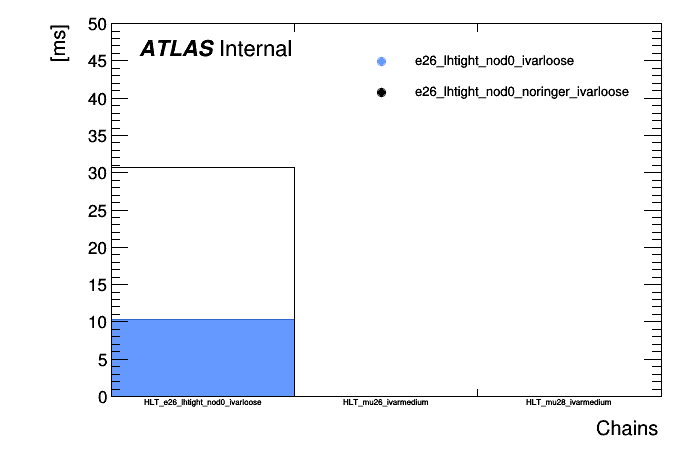

In [7]:
def plot_primary_trigger_time_summary():

    drawopt='hist'
    divide=''
    h1 = f_ringer.Get("TIMERS/TrigSteer_HLT_Chains_runsummary")
    h2 = f_noringer.Get("TIMERS/TrigSteer_HLT_Chains_runsummary")

    outcan = TCanvas( 'canvas', "", 700, 500 ) 
    h1.SetLineColor(kAzure-5)
    h1.SetFillColor(kAzure-4)
    h1.SetMarkerColor(kAzure-4)
    h2.SetLineColor(kBlack)
  
    outcan.SaveAs( "plot_chain_summary.C" )
    h1.SetMaximum(50)
    h1.SetAxisRange(0,2,'X')
    h2.SetAxisRange(0,2,'X')
    h1.SetAxisRange(0,50,'Y')
    h2.SetAxisRange(0,50,'Y')
    AddHistogram(outcan,h1,drawopt=drawopt) 
    AddHistogram(outcan,h2,drawopt=drawopt) 

    ATLASLabel(0.2,0.88,'Internal')
    outcan.Modified()
    outcan.Update()
    outcan.Draw()
    MakeLegend(outcan,.50,.77,.89,.97,option='p',textsize=14, names=['e26_lhtight_nod0_ivarloose',
            'e26_lhtight_nod0_noringer_ivarloose'], ncolumns=1, squarebox=False, doFixLength=False)
  
    FormatCanvasAxes(outcan, XLabelSize=9, YLabelSize=18, XTitleOffset=0.87, YTitleOffset=1)
    SetAxisLabels(outcan,"Chains",'[ms]')
  
    outcan.SaveAs("plot_chain_summary.pdf")
    outcan.Draw()

plot_primary_trigger_time_summary()